## 로지스틱 회귀로 와인 분류하기

In [3]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine-date')

In [8]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [9]:
wine.head(5)

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


### 문제 정의
레드와 화이트를 분류하는 이진 분류
* 화이트가 양성(1)


In [10]:
# pandas to numpy
df = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine ['class'].to_numpy()

In [12]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    df, target, test_size = 0.2, random_state = 42)
print(test_input.shape, train_input.shape)

(1300, 3) (5197, 3)


### 전처리_StandardScaler
* 각 열의 feature 값의 평균을 0으로 잡고 표준편차를 1로 간주해 정규화
**평균에서 몇 표준편차만큼 떨어져있는지**

In [13]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### Logistic Regression model train

- score이 결정계수인지 헷갈렸다. score을 결정계수로 사용하는 상황은 변수가 연속형일 때다. 
> * (multiple) linear regression
> * ridge, lasso regression

연속형 변수의 경우, 오차가 모델 성능 평가에 중요하다.
- 실제값과 예측값의 차이에 대한 정확도를 구하는 것이 의미가 없다. 

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target)) 

0.7808350971714451
0.7776923076923077


In [17]:
# logistic coef, intercept
print(lr.coef_, lr.intercept_)

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


logistic 회귀 모델식:
도수 * 0.5 + 당도 * 1.7 - pH * 0.7 + 1.8
- 정확도는 0.7

### 결정 트리

- import DecisionTreeClassifier
- Top-down (Root node to leaf node)


In [20]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target)) 
# 과적합

0.996921300750433
0.8592307692307692


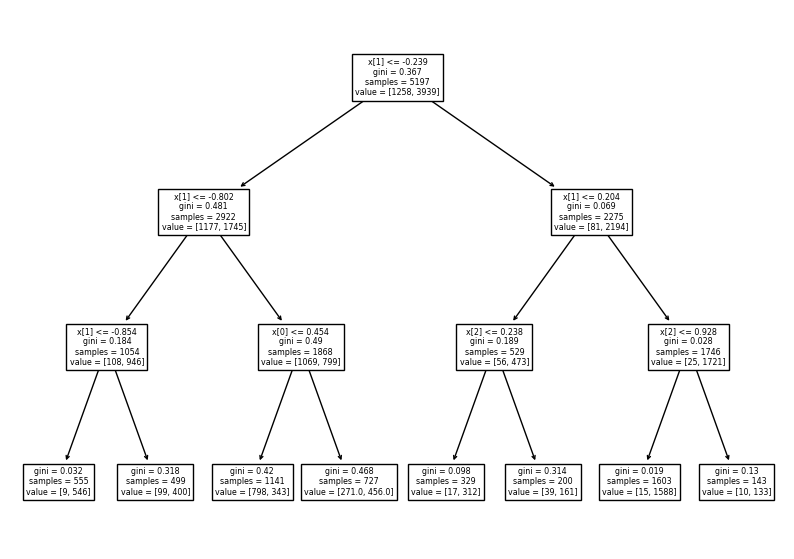

In [28]:
# 시각화 plot_tree()
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize = (10,7))
plot_tree(dt)
plt.show()

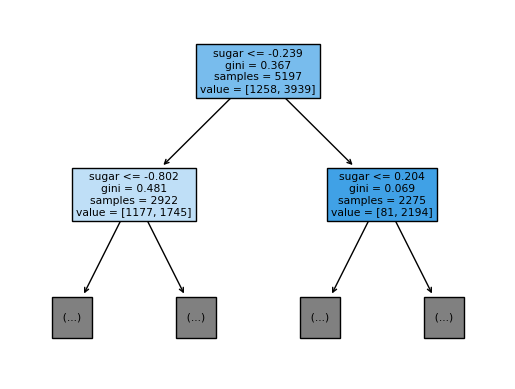

In [24]:
# 깊이를 제한해서 출력 _ max_depth
# filled _ 색칠
# feature_names _ 특성 이름 전달
plot_tree(dt, max_depth = 1, filled = True, 
          feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

In [26]:
# 과대 적합을 막기 위해 가지치기 _ 최대 깊이 정하기. 
dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


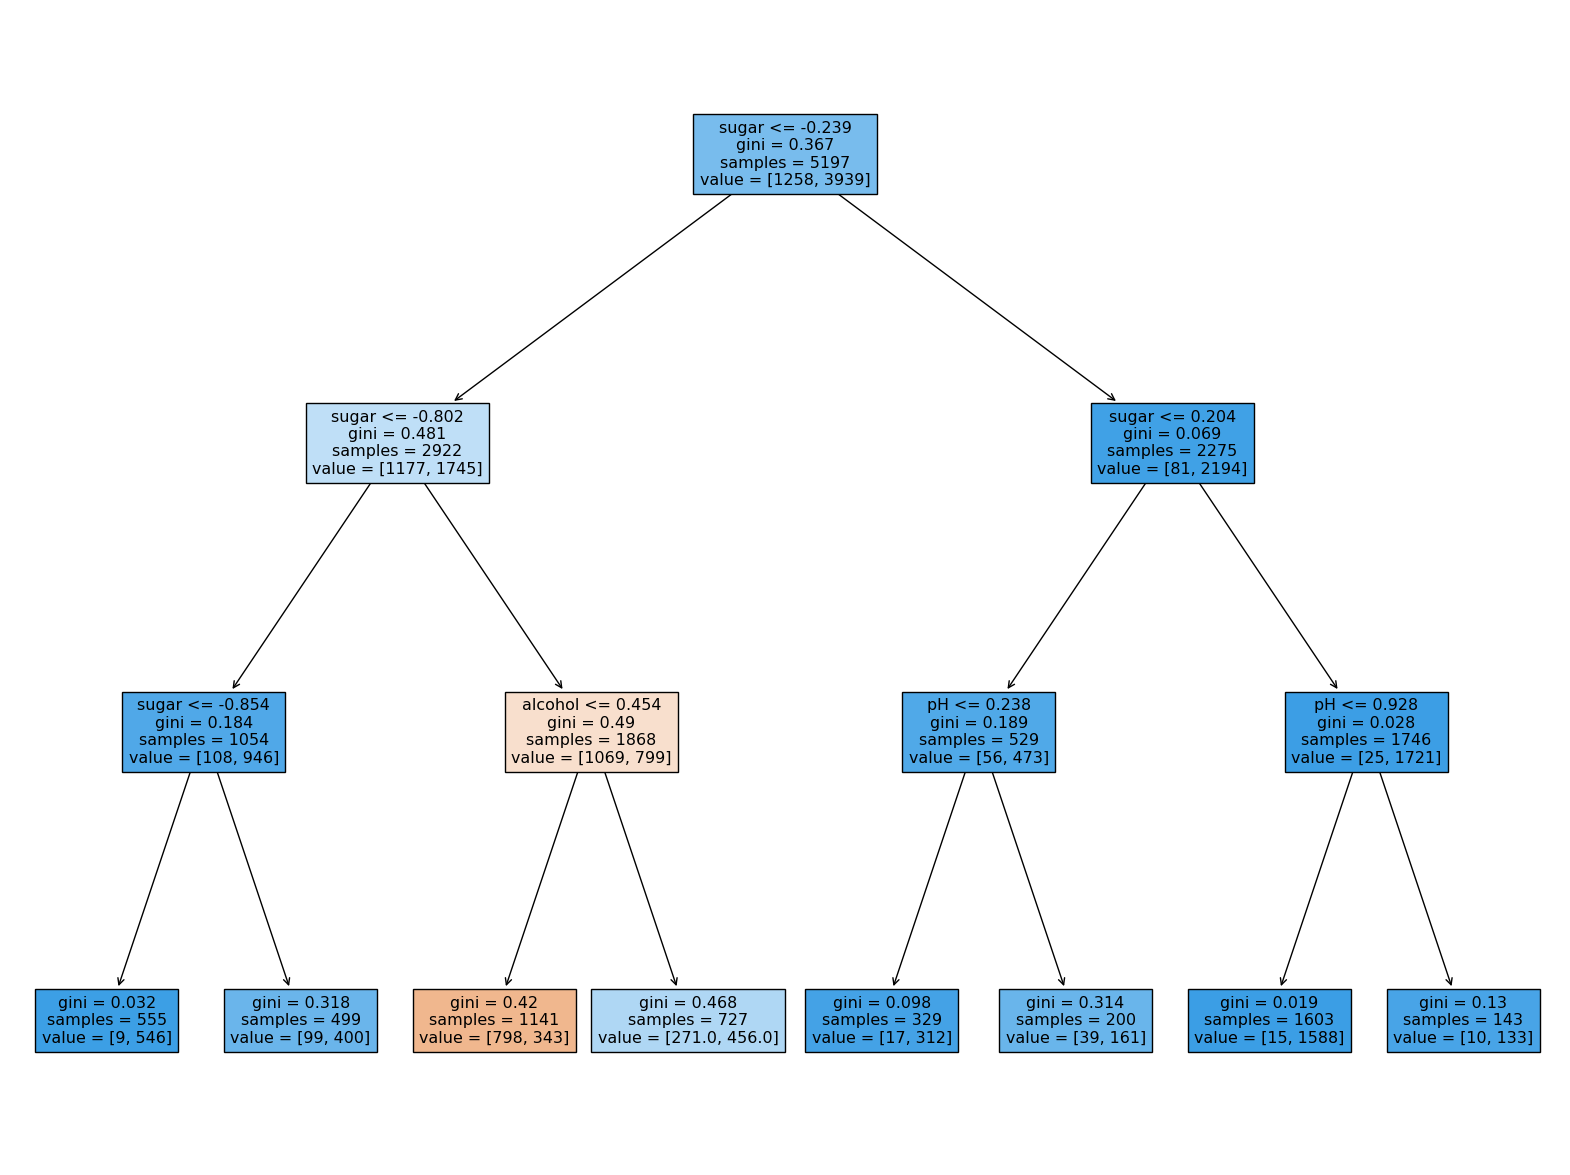

In [30]:
# 시각화
plt.figure(figsize = (20, 15))
plot_tree(dt, filled = True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [31]:
# 결정트리는 표준화 전처리가 필요없다. 
# 불순도가 클래스별 비율로 결정하기 때문이다. 
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


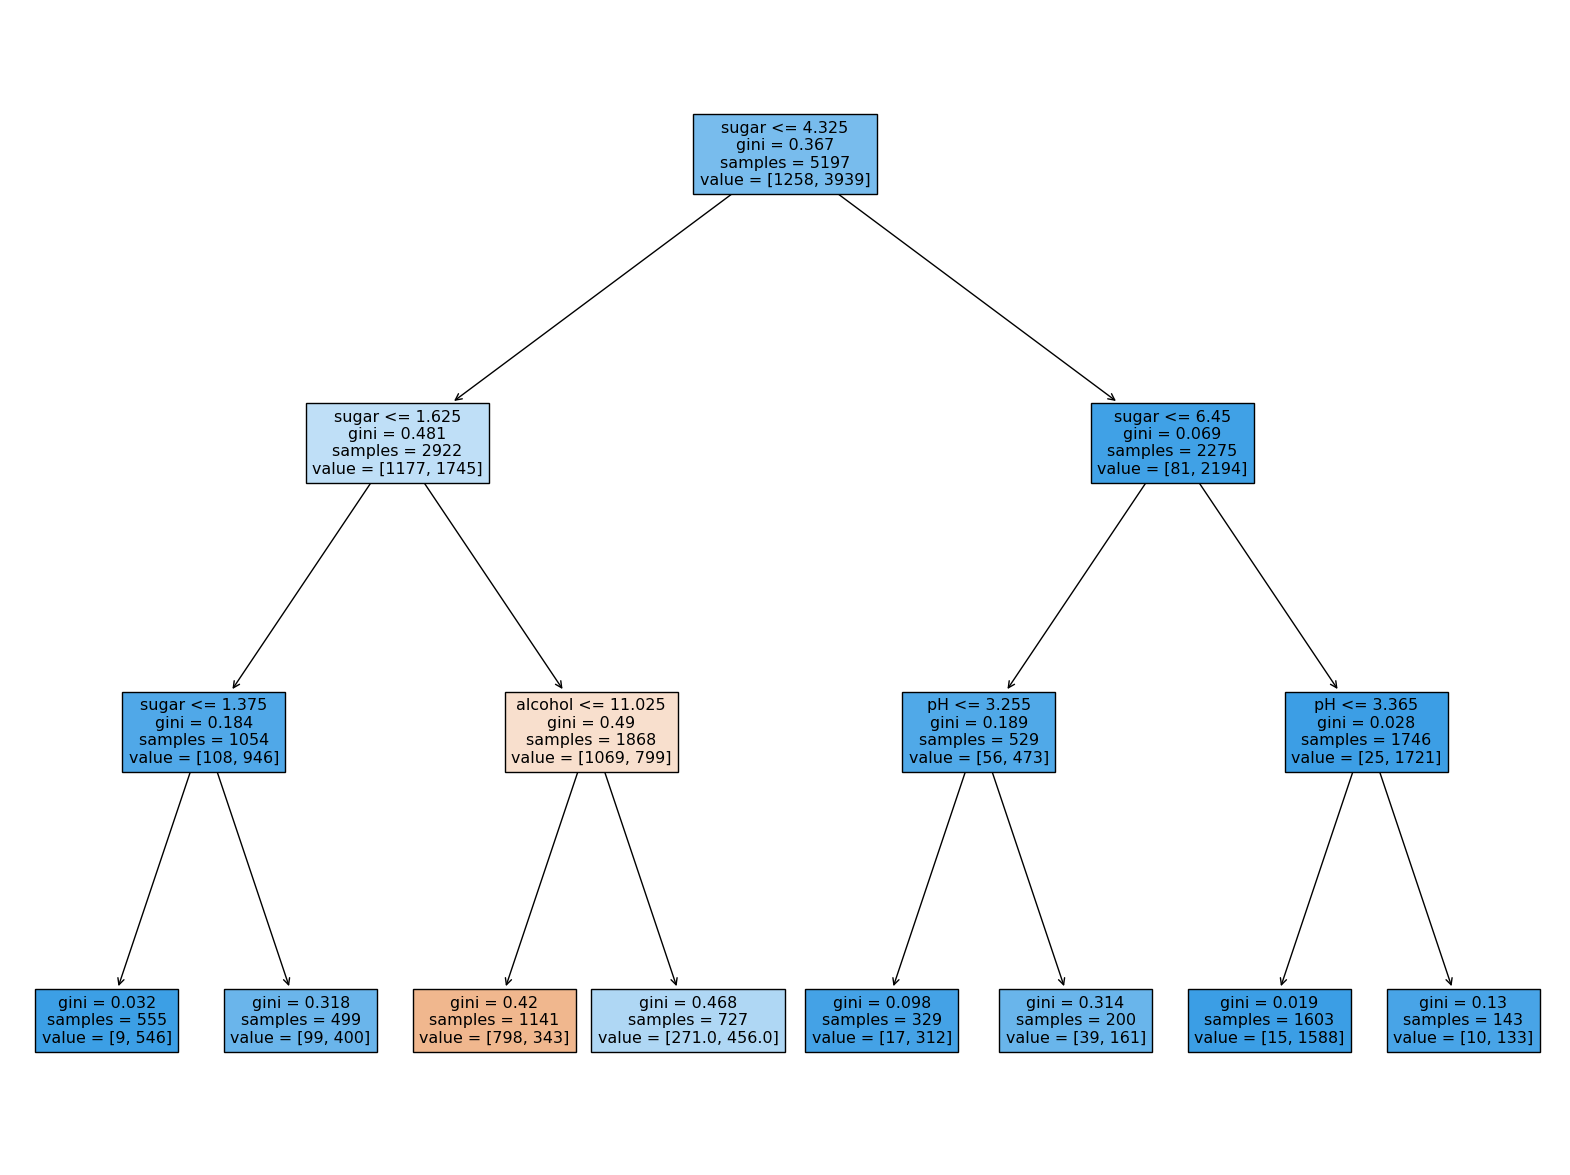

In [32]:
# 전처리 하지 않은 계수가 더 이해하기 쉽다. 
plt.figure(figsize = (20, 15))
plot_tree(dt, filled = True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [35]:
# 특성 중요도를 계산한다. 
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]
